In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from random import seed,sample,randrange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

In [9]:
X1 = np.array(sample(range(0, 10000), 5000))
X2 = np.array(sample(range(0, 10000), 5000))
X=pd.DataFrame({"c1":X1,"c2":X2})

In [10]:
y=X1*X1 + X2*X2

In [11]:
RandomState = 42
seed(21)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

In [21]:

model.compile(loss="mean_absolute_percentage_error", optimizer="adam")

In [25]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None


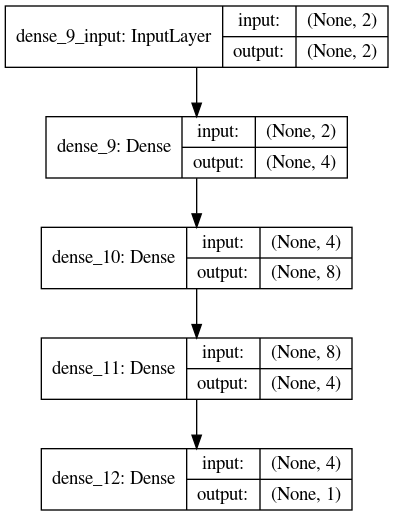

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
print("[INFO] training model...")
model.fit(x=X_train, y=y_train, 
    epochs=200, batch_size=200)

[INFO] training model...
Epoch 1/200
3750/3750 [==============================] - 0s 34us/step - loss: 97.3409
Epoch 2/200
3750/3750 [==============================] - 0s 24us/step - loss: 97.3398
Epoch 3/200
3750/3750 [==============================] - 0s 20us/step - loss: 97.3380
Epoch 4/200
3750/3750 [==============================] - 0s 14us/step - loss: 97.3373
Epoch 5/200
3750/3750 [==============================] - 0s 19us/step - loss: 97.3351
Epoch 6/200
3750/3750 [==============================] - 0s 18us/step - loss: 97.3337
Epoch 7/200
3750/3750 [==============================] - 0s 18us/step - loss: 97.3322
Epoch 8/200
3750/3750 [==============================] - 0s 14us/step - loss: 97.3313
Epoch 9/200
3750/3750 [==============================] - 0s 20us/step - loss: 97.3295
Epoch 10/200
3750/3750 [==============================] - 0s 21us/step - loss: 97.3274
Epoch 11/200
3750/3750 [==============================] - 0s 20us/step - loss: 97.3261
Epoch 12/200
3750/3750 [===

In [31]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [32]:
scores

96.63514869384765